<h1>Script: data_preparation.ipynb</h1>

This Jupyter Notebook contains a sequence of data preparation and processing steps to clean and transform the raw data into a form suitable for further analysis and modeling. The operations include:

1. Importing the necessary libraries and loading the raw data.
2. Checking for unique values and dropping irrelevant index columns.
3. Creating a "WeekIndex" column and renaming various columns for clarity.
4. Conducting unit tests to ensure row uniqueness.
5. Applying Binary Encoding to categorical variables like 'District' and 'PC6'.
6. Creating the 'number_of_chargers' column as the sum of all providers.
7. Renaming the 'kWh' column to 'Consumed_kWh' and grouping the columns into several categories (identifiers, target variables, known variables, unknown variables, purely descriptive variables).
8. Dealing with missing values and sorting the DataFrame by the 'Date' column.
9. Adding 'WeekOfYear' and 'MonthOfYear' columns and applying the sine and cosine transformations to introduce the cyclical nature of weeks and months.
10. Creating a column 'PC6_WeekIndex' as the concatenation of 'PC6' and 'WeekIndex' columns.
11. Enriching data with lagged values of target columns.
12. Applying MinMaxScaler to scale the data and converting certain column datatypes to float64.
13. Saving the processed DataFrame to a new CSV file.

In [1]:
# import libraries
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)

# specify name of csv file
filename = 'final_data.csv'

# open csv file
df = pd.read_csv(filename)

df.head()

,Unnamed: 0.1,Unnamed: 0,PC6,Date,District,ConnectionTimeHours,kWh,effective_charging_hrs,power,MaxOccupancy,MaxPower,Blocked_kWh,Total,Vattenfall,Allego,Equans,EvBox,Nuon,WDS,Engie,Pitpoint,Ecotap,ChargeSocket_ID_count,IsFastCharger,0-1,1-2,2-3,3-4,4-5,5-6,6-7,7-8,8-9,9-10,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-24,effective_charging_hrs0-1,effective_charging_hrs1-2,effective_charging_hrs2-3,effective_charging_hrs3-4,effective_charging_hrs4-5,effective_charging_hrs5-6,effective_charging_hrs6-7,effective_charging_hrs7-8,effective_charging_hrs8-9,effective_charging_hrs9-10,effective_charging_hrs10-11,effective_charging_hrs11-12,effective_charging_hrs12-13,effective_charging_hrs13-14,effective_charging_hrs14-15,effective_charging_hrs15-16,effective_charging_hrs16-17,effective_charging_hrs17-18,effective_charging_hrs18-19,effective_charging_hrs19-20,effective_charging_hrs20-21,effective_charging_hrs21-22,effective_charging_hrs22-23,effective_charging_hrs23-24,SpareCap_Effective,SpareCap_Occup_kWh,SpareCap_Hrs,Effective%,Occupancy_kwh%,index,bus_count,metro_count,tram_count,parking_count,traffic_area,built_up_area,semi_built_up_area,recreational_area,agrarian_area,forest_nature_are,water_body_area,December 2022_EV,December 2022_hybrid,2022_0_to_10,2022_10_to_20,2022_20_to_30,2022_30_to_40,2022_40_to_50,2019.0_household,2019.0_income_1_to_40_percent,2019.0_income_41_to_80_percent,2019.0_income_81_to_100_percent,2019.0_income_average,2019.0_assets_1_to_40_percent,2019.0_assets_41_to_80_percent,2019.0_assets_81_to_100_percent,2019.0_assets_average,2019.0_Gemiddelde SES WOA totaalscore
0,0,0,1011AB,2022-01-03,Centrum,67.59,125.8,22.789855,33.12,288.0,1589.76,373.0968,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.433333,3.133333,4.3,4.433333,3.233333,2.9,2.716667,2.966667,4.0,3.716667,4.216667,3.933333,3.0,2.95,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.168478,2.133333,3.3,3.433333,3.0,1.82029,1.519928,0.776087,2.0,1.001449,1.533333,2.0,2.0,1.966667,1463.96,-648.8208,220.41,0.079131,1.408125,1,0.0,0.0,0.0,0.0,5.5393,5.3554,1.4589,0.0,0.0,0.0,11.9398,367.0,187.0,475.0,540.0,2065.0,1645.0,1080.0,6200.0,45.0,28.0,27.1,49.3,50.8,23.0,26.2,47.6,0.034
1,66,66,1011AC,2022-01-03,0,0.00,0.0,0.000000,0.00,0.0,0.00,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.0000,0.00,0.000000,0.000000,1,0.0,0.0,1.0,0.0,5.5393,5.3554,1.4589,0.0,0.0,0.0,11.9398,367.0,187.0,475.0,540.0,2065.0,1645.0,1080.0,6200.0,45.0,28.0,27.1,49.3,50.8,23.0,26.2,47.6,0.034
2,132,18084,1011AD,2022-01-03,0,0.00,0.0,0.000000,0.00,0.0,0.00,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.0000,0.00,0.000000,0.000000,1,0.0,0.0,0.0,0.0,5.5393,5.3554,1.4589,0.0,0.0,0.0,11.9398,367.0,187.0,475.0,540.0,2065.0,1645.0,1080.0,6200.0,45.0,28.0,27.1,49.3,50.8,23.0,26.2,47.6,0.034
3,198,18150,1011AE,2022-01-03,0,0.00,0.0,0.000000,0.00,0.0,0.00,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.0000,0.00,0.000000,0.000000,1,0.0,0.0,0.0,0.0,5.5393,5.3554,1.4589,0.0,0.0,0.0,11.9398,367.0,187.0,475.0,540.0,2065.0,1645.0,1080.0,6200.0,45.0,28.0,2

In [3]:
# number of unique values in first column
print(df[df.columns[0]].nunique())

# number of unique values in second column
print(df[df.columns[1]].nunique())

# one column of index can be dropped, since it is not the correct index

1219812
1219812


In [4]:
# create a new column called "WeekIndex" which first lists all unique values of the date column, then assigns a number to each unique value starting from 0 for the lowest value
df['WeekIndex'] = df['Date'].astype('category').cat.codes

In [5]:
# print first 5 rows
df.rename(columns={df.columns[0]: 'index_to_drop', df.columns[1]: 'RowIndex'},inplace=True)

# remove "index" column, since this is not the correct index
df.drop(columns=["index_to_drop"], inplace=True)

# remove "index" column, since this is not the correct index
df.drop(columns=["index"], inplace=True)

In [6]:
# rename column "IsFastCharger" to "FastChargerNumber"
df.rename(columns={"IsFastCharger": "FastChargerNumber"}, inplace=True)

In [7]:
# unit test that each row has a unique index
assert df['RowIndex'].nunique() == len(df.index)

# convert 'RowIndex' column to integer
df['RowIndex'] = df['RowIndex'].astype(int)

# set the 'RowIndex' column to index
df = df.set_index("RowIndex")

In [8]:
# cut district column and insert as last column
df['District-encoded'] = df['District'].str[0:2]

# count unique categories in District column -> 11
print(df["District-encoded"].nunique())

# encode categorical variable "District" with binary encoding
# documentation: https://contrib.scikit-learn.org/category_encoders/binary.html
from category_encoders.binary import BinaryEncoder
encoder = BinaryEncoder(cols=['District-encoded'])
encoder.fit(df)
df = encoder.transform(df)

9


In [9]:
# count unique categories in ZipCode "PC6" column
print(df["PC6"].nunique())

# retrieve PC4 from PC6, that is the first 4 digits of the 6 digit zip code
df["PC4"] = df["PC6"].astype(str).str[:4]
df["PC6-encoded"] = df["PC6"]
df["PC4-encoded"] = df["PC4"]
print(df["PC4-encoded"].nunique())

# encode categorical variable "PC4" with binary encoding
encoder = BinaryEncoder(cols=['PC4-encoded'])
encoder.fit(df)
df = encoder.transform(df)

# encode categorical variable "PC4" with binary encoding
encoder = BinaryEncoder(cols=['PC6-encoded'])
encoder.fit(df)
df = encoder.transform(df)

18482
81


In [10]:
df.head()

,PC6,Date,District,ConnectionTimeHours,kWh,effective_charging_hrs,power,MaxOccupancy,MaxPower,Blocked_kWh,Total,Vattenfall,Allego,Equans,EvBox,Nuon,WDS,Engie,Pitpoint,Ecotap,ChargeSocket_ID_count,FastChargerNumber,0-1,1-2,2-3,3-4,4-5,5-6,6-7,7-8,8-9,9-10,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-24,effective_charging_hrs0-1,effective_charging_hrs1-2,effective_charging_hrs2-3,effective_charging_hrs3-4,effective_charging_hrs4-5,effective_charging_hrs5-6,effective_charging_hrs6-7,effective_charging_hrs7-8,effective_charging_hrs8-9,effective_charging_hrs9-10,effective_charging_hrs10-11,effective_charging_hrs11-12,effective_charging_hrs12-13,effective_charging_hrs13-14,effective_charging_hrs14-15,effective_charging_hrs15-16,effective_charging_hrs16-17,effective_charging_hrs17-18,effective_charging_hrs18-19,effective_charging_hrs19-20,effective_charging_hrs20-21,effective_charging_hrs21-22,effective_charging_hrs22-23,effective_charging_hrs23-24,SpareCap_Effective,SpareCap_Occup_kWh,SpareCap_Hrs,Effective%,Occupancy_kwh%,bus_count,metro_count,tram_count,parking_count,traffic_area,built_up_area,semi_built_up_area,recreational_area,agrarian_area,forest_nature_are,water_body_area,December 2022_EV,December 2022_hybrid,2022_0_to_10,2022_10_to_20,2022_20_to_30,2022_30_to_40,2022_40_to_50,2019.0_household,2019.0_income_1_to_40_percent,2019.0_income_41_to_80_percent,2019.0_income_81_to_100_percent,2019.0_income_average,2019.0_assets_1_to_40_percent,2019.0_assets_41_to_80_percent,2019.0_assets_81_to_100_percent,2019.0_assets_average,2019.0_Gemiddelde SES WOA totaalscore,WeekIndex,District-encoded_0,District-encoded_1,District-encoded_2,District-encoded_3,PC4,PC6-encoded_0,PC6-encoded_1,PC6-encoded_2,PC6-encoded_3,PC6-encoded_4,PC6-encoded_5,PC6-encoded_6,PC6-encoded_7,PC6-encoded_8,PC6-encoded_9,PC6-encoded_10,PC6-encoded_11,PC6-encoded_12,PC6-encoded_13,PC6-encoded_14,PC4-encoded_0,PC4-encoded_1,PC4-encoded_2,PC4-encoded_3,PC4-encoded_4,PC4-encoded_5,PC4-encoded_6
RowIndex,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1011AB,2022-01-03,Centrum,67.59,125.8,22.789855,33.12,288.0,1589.76,373.0968,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.433333,3.133333,4.3,4.433333,3.233333,2.9,2.716667,2.966667,4.0,3.716667,4.216667,3.933333,3.0,2.95,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.168478,2.133333,3.3,3.433333,3.0,1.82029,1.519928,0.776087,2.0,1.001449,1.533333,2.0,2.0,1.966667,1463.96,-648.8208,220.41,0.079131,1.408125,0.0,0.0,0.0,0.0,5.5393,5.3554,1.4589,0.0,0.0,0.0,11.9398,367.0,187.0,475.0,540.0,2065.0,1645.0,1080.0,6200.0,45.0,28.0,27.1,49.3,50.8,23.0,26.2,47.6,0.034,0,0,0,0,1,1011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
66,1011AC,2022-01-03,0,0.00,0.0,0.000000,0.00,0.0,0.00,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.0000,0.00,0.000000,0.000000,0.0,0.0,1.0,0.0,5.5393,5.3554,1.4589,0.0,0.0,0.0,11.9398,367.0,187.0,475.0,540.0,2065.0,1645.0,1080.0,6200.0,45.0,28.0,27.1,49.3,50.8,23.0,26.2,47.6,0.034,0,0,0,1,0,1011,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
18084,1011AD,2022-01-03,0,0.00,0.0,0.000000,0.00,0.0,0.00,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.0000,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,5.5393,5.3554,1.4589,0.0,0.0,0.0,11.9398,367.0,187.0,475.0,540.0,2065.0,1645.0,1080

In [11]:
# all columns (including provider columns) that are not in the above lists are unknown variables
providers = ["Total", "Vattenfall", "Allego", "Equans", "EvBox", "Nuon", "WDS", "Pitpoint", "Ecotap", "Engie"]

# create a new column called "number of chargers" which is the sum of the values of the columns which names are stored in the providers list
df['number_of_chargers'] = df[providers].sum(axis=1)

providers.append("number_of_chargers")

# reverse list
providers = providers[::-1]

In [12]:
# rename column kWh to Consumed_kWh
df.rename(columns={"kWh": "Consumed_kWh"}, inplace=True)

In [13]:
# split columns into several groups: identifiers, target variables, know_variables, unknown_variables, purely_descriptive_variables

# reorder columns in the following order:
identifiers = ["PC6", "Date"]
know_variables = ["WeekIndex", "MaxPower"]
target_variables = ["Consumed_kWh", "Blocked_kWh"]

purely_descriptive_variables = ["ChargeSocket_ID_count", "ConnectionTimeHours", "power", "effective_charging_hrs", "MaxOccupancy", "SpareCap_Effective", "SpareCap_Occup_kWh", "SpareCap_Hrs", "Effective%", "Occupancy_kwh%"]


unknown_variables = [col for col in df.columns if col not in identifiers + target_variables + know_variables + providers+ purely_descriptive_variables]
unknown_variables = providers + unknown_variables

print(len(identifiers + target_variables + know_variables + purely_descriptive_variables + unknown_variables))

132


In [14]:
# sort df columns in the following order: identifiers, target variables, know_variables, unknown_variables, purely_descriptive_variables
df = df[identifiers + know_variables + target_variables + unknown_variables + purely_descriptive_variables]

In [15]:
# inspect df without the purely_descriptive_variables
df[identifiers + know_variables + target_variables + unknown_variables].head()

,PC6,Date,WeekIndex,MaxPower,Consumed_kWh,Blocked_kWh,number_of_chargers,Engie,Ecotap,Pitpoint,WDS,Nuon,EvBox,Equans,Allego,Vattenfall,Total,District,FastChargerNumber,0-1,1-2,2-3,3-4,4-5,5-6,6-7,7-8,8-9,9-10,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-24,effective_charging_hrs0-1,effective_charging_hrs1-2,effective_charging_hrs2-3,effective_charging_hrs3-4,effective_charging_hrs4-5,effective_charging_hrs5-6,effective_charging_hrs6-7,effective_charging_hrs7-8,effective_charging_hrs8-9,effective_charging_hrs9-10,effective_charging_hrs10-11,effective_charging_hrs11-12,effective_charging_hrs12-13,effective_charging_hrs13-14,effective_charging_hrs14-15,effective_charging_hrs15-16,effective_charging_hrs16-17,effective_charging_hrs17-18,effective_charging_hrs18-19,effective_charging_hrs19-20,effective_charging_hrs20-21,effective_charging_hrs21-22,effective_charging_hrs22-23,effective_charging_hrs23-24,bus_count,metro_count,tram_count,parking_count,traffic_area,built_up_area,semi_built_up_area,recreational_area,agrarian_area,forest_nature_are,water_body_area,December 2022_EV,December 2022_hybrid,2022_0_to_10,2022_10_to_20,2022_20_to_30,2022_30_to_40,2022_40_to_50,2019.0_household,2019.0_income_1_to_40_percent,2019.0_income_41_to_80_percent,2019.0_income_81_to_100_percent,2019.0_income_average,2019.0_assets_1_to_40_percent,2019.0_assets_41_to_80_percent,2019.0_assets_81_to_100_percent,2019.0_assets_average,2019.0_Gemiddelde SES WOA totaalscore,District-encoded_0,District-encoded_1,District-encoded_2,District-encoded_3,PC4,PC6-encoded_0,PC6-encoded_1,PC6-encoded_2,PC6-encoded_3,PC6-encoded_4,PC6-encoded_5,PC6-encoded_6,PC6-encoded_7,PC6-encoded_8,PC6-encoded_9,PC6-encoded_10,PC6-encoded_11,PC6-encoded_12,PC6-encoded_13,PC6-encoded_14,PC4-encoded_0,PC4-encoded_1,PC4-encoded_2,PC4-encoded_3,PC4-encoded_4,PC4-encoded_5,PC4-encoded_6
RowIndex,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1011AB,2022-01-03,0,1589.76,125.8,373.0968,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,Centrum,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.433333,3.133333,4.3,4.433333,3.233333,2.9,2.716667,2.966667,4.0,3.716667,4.216667,3.933333,3.0,2.95,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.168478,2.133333,3.3,3.433333,3.0,1.82029,1.519928,0.776087,2.0,1.001449,1.533333,2.0,2.0,1.966667,0.0,0.0,0.0,0.0,5.5393,5.3554,1.4589,0.0,0.0,0.0,11.9398,367.0,187.0,475.0,540.0,2065.0,1645.0,1080.0,6200.0,45.0,28.0,27.1,49.3,50.8,23.0,26.2,47.6,0.034,0,0,0,1,1011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
66,1011AC,2022-01-03,0,0.00,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,5.5393,5.3554,1.4589,0.0,0.0,0.0,11.9398,367.0,187.0,475.0,540.0,2065.0,1645.0,1080.0,6200.0,45.0,28.0,27.1,49.3,50.8,23.0,26.2,47.6,0.034,0,0,1,0,1011,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
18084,1011AD,2022-01-03,0,0.00,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,5.5393,5.3554,1.4589,0.0,0.0,0.0,11.9398,367.0,187.0,475.0,540.0,2065.0,1645.0,1080.0,6200.0,45.0,28.0,27.1,49.3,50.8,23.0,26.2,47.6,0.034,0,0,1,0,1011,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
18150,1011AE,2022-01-03,0,0.00,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000

In [16]:
# check missing values: show only columns where missing values >0 and their count per column
print(df.isna().sum()[df.isna().sum() > 0])

Series([], dtype: int64)


In [17]:
# sort df by date column
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=['PC6', 'Date'])

In [18]:
# add week of year column, extracted from date column
df["WeekOfYear"] = pd.to_datetime(df['Date']).dt.isocalendar().week

# month of year
df["MonthOfYear"] = pd.to_datetime(df['Date']).dt.month

# sine and cosine week of year -> to introduce cyclical nature of months
# sine & cosine week of year
# cosine week of year
df["CosWeekOfYear"] = np.cos(2*np.pi*df["WeekOfYear"]/52)

# sine week of year
df["SinWeekOfYear"] = np.sin(2*np.pi*df["WeekOfYear"]/52)

# cosine month of year
df["CosMonthOfYear"] = np.cos(2*np.pi*df["MonthOfYear"]/12)

# sine month of year
df["SinMonthOfYear"] = np.sin(2*np.pi*df["MonthOfYear"]/12)

# drop week of year, month of year columns
df.drop(columns=["WeekOfYear", "MonthOfYear"], inplace=True)

In [19]:
df.head()

,PC6,Date,WeekIndex,MaxPower,Consumed_kWh,Blocked_kWh,number_of_chargers,Engie,Ecotap,Pitpoint,WDS,Nuon,EvBox,Equans,Allego,Vattenfall,Total,District,FastChargerNumber,0-1,1-2,2-3,3-4,4-5,5-6,6-7,7-8,8-9,9-10,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-24,effective_charging_hrs0-1,effective_charging_hrs1-2,effective_charging_hrs2-3,effective_charging_hrs3-4,effective_charging_hrs4-5,effective_charging_hrs5-6,effective_charging_hrs6-7,effective_charging_hrs7-8,effective_charging_hrs8-9,effective_charging_hrs9-10,effective_charging_hrs10-11,effective_charging_hrs11-12,effective_charging_hrs12-13,effective_charging_hrs13-14,effective_charging_hrs14-15,effective_charging_hrs15-16,effective_charging_hrs16-17,effective_charging_hrs17-18,effective_charging_hrs18-19,effective_charging_hrs19-20,effective_charging_hrs20-21,effective_charging_hrs21-22,effective_charging_hrs22-23,effective_charging_hrs23-24,bus_count,metro_count,tram_count,parking_count,traffic_area,built_up_area,semi_built_up_area,recreational_area,agrarian_area,forest_nature_are,water_body_area,December 2022_EV,December 2022_hybrid,2022_0_to_10,2022_10_to_20,2022_20_to_30,2022_30_to_40,2022_40_to_50,2019.0_household,2019.0_income_1_to_40_percent,2019.0_income_41_to_80_percent,2019.0_income_81_to_100_percent,2019.0_income_average,2019.0_assets_1_to_40_percent,2019.0_assets_41_to_80_percent,2019.0_assets_81_to_100_percent,2019.0_assets_average,2019.0_Gemiddelde SES WOA totaalscore,District-encoded_0,District-encoded_1,District-encoded_2,District-encoded_3,PC4,PC6-encoded_0,PC6-encoded_1,PC6-encoded_2,PC6-encoded_3,PC6-encoded_4,PC6-encoded_5,PC6-encoded_6,PC6-encoded_7,PC6-encoded_8,PC6-encoded_9,PC6-encoded_10,PC6-encoded_11,PC6-encoded_12,PC6-encoded_13,PC6-encoded_14,PC4-encoded_0,PC4-encoded_1,PC4-encoded_2,PC4-encoded_3,PC4-encoded_4,PC4-encoded_5,PC4-encoded_6,ChargeSocket_ID_count,ConnectionTimeHours,power,effective_charging_hrs,MaxOccupancy,SpareCap_Effective,SpareCap_Occup_kWh,SpareCap_Hrs,Effective%,Occupancy_kwh%,CosWeekOfYear,SinWeekOfYear,CosMonthOfYear,SinMonthOfYear
RowIndex,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1011AB,2022-01-03,0,1589.76,125.80,373.0968,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,Centrum,0.0,2.00,2.000000,2.0,2.0,2.000000,2.0,2.000000,2.000000,2.000000,2.000000,2.433333,3.133333,4.300000,4.433333,3.233333,2.900000,2.716667,2.966667,4.000000,3.716667,4.216667,3.933333,3.000000,2.950000,2.00,2.000000,2.000000,2.0,2.000000,2.0,2.000000,2.000000,2.000000,2.000000,2.168478,2.133333,3.300000,3.433333,3.000000,1.820290,1.519928,0.776087,2.000000,1.001449,1.533333,2.000000,2.000000,1.966667,0.0,0.0,0.0,0.0,5.5393,5.3554,1.4589,0.0,0.0,0.0,11.9398,367.0,187.0,475.0,540.0,2065.0,1645.0,1080.0,6200.0,45.0,28.0,27.1,49.3,50.8,23.0,26.2,47.6,0.034,0,0,0,1,1011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,10.0,67.59,33.12,22.789855,288.0,1463.96,-648.8208,220.41,0.079131,1.408125,0.992709,0.120537,0.866025,0.5
1,1011AB,2022-01-10,1,3709.44,457.95,904.3416,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,Centrum,0.0,3.75,4.000000,4.0,4.0,4.000000,4.0,4.183333,5.150000,7.233333,10.333333,12.083333,13.683333,12.750000,12.233333,12.783333,9.116667,6.583333,7.350000,6.016667,5.633333,5.000000,3.933333,3.000000,2.950000,3.75,4.000000,3.675725,3.0,3.000000,3.0,3.183333,4.150000,5.975362,8.866667,10.402536,9.167754,6.113043,6.038406,4.959058,2.844928,2.850000,5.583696,4.716667,4.569928,4.000000,2.702899,1.682246,0.983333,0.0,0.0,0.0,0.0,5.5393,5.3554,1.4589,0.0,0.0,0.0,11.9398,367.0,187.0,475.0,540.0,2065.0,1645.0,1080.0,6200.0,45.0,28.0,27.1,49.3,50.8,23.0,26.2,47.6,0.034,0,0,0,1,1011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,26.0,163.83,77.28,82.961957,672.0,3251.49,-8951.3424,508.17,0.123455,3.413125,0.970942,0.239316,0.866025,0.5
2,1011AB,2022-01-17,2,3709.44,525.80,1298.3040,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,Ce

In [20]:
# count number of remaining rows
print(df.shape)

(1219812, 136)


In [21]:
# load cleaned data
# df = pd.read_csv(filename.split('.')[0] + '_cleaned.csv')

# create new column as concatenation of PC6 and WeekIndex columns
df['PC6_WeekIndex'] = df['PC6'].astype(str) + df['WeekIndex'].astype(str)

# move this column to the first position
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]

# count duplicates in PC6_WeekIndex column
df['PC6_WeekIndex'].duplicated().sum()

0

In [22]:
# identifier columns
identifier_columns = ["PC6", "Date", "PC6_WeekIndex"]

# target columns
target_columns = ["Consumed_kWh", "Blocked_kWh"]

# duplicate target columns and add them to the data frame
duplicate_target_columns = [col + "_lag" for col in target_columns]
df[duplicate_target_columns] = df[target_columns]

# enrich data with lagged values of target columns
lagged_columns = ["MaxPower", "number_of_chargers"]

# specify time columns
time_columns = ["WeekIndex", "SinWeekOfYear", "CosWeekOfYear", "SinMonthOfYear", "CosMonthOfYear"]

# descriptive columns
descriptive_columns = ["ChargeSocket_ID_count", "ConnectionTimeHours", "power", "effective_charging_hrs", "MaxOccupancy", "SpareCap_Effective", "SpareCap_Occup_kWh", "SpareCap_Hrs", "Effective%", "Occupancy_kwh%", "PC4", "District"]

# encoded columns -> include "encoded" string in column name
encoded_columns = [col for col in df.columns if "encoded" in col]

all_columns = identifier_columns + target_columns + lagged_columns + time_columns + descriptive_columns + encoded_columns

# show columns that are not in the above lists
numerical_features = ([col for col in df.columns if col not in all_columns])

# print lists of columns
print(f"identifier_columns [{len(identifier_columns)}]: {identifier_columns}")
print(f"target_columns [{len(target_columns)}]: {target_columns}")
print(f"duplicate_target_columns [{len(duplicate_target_columns)}]: {duplicate_target_columns}")
print(f"lagged_columns [{len(lagged_columns)}]: {lagged_columns}")
print(f"time_columns [{len(time_columns)}]: {time_columns}")
print(f"numerical_features [{len(numerical_features)}]: {numerical_features}")
print(f"encoded_columns [{len(encoded_columns)}]: {encoded_columns}")
print(f"descriptive_columns [{len(descriptive_columns)}]: {descriptive_columns}")

# store all lists in a dictionary
column_lists = {"identifier_columns": identifier_columns,
                "target_columns": target_columns,
                "duplicate_target_columns": duplicate_target_columns,
                "lagged_columns": lagged_columns,
                "time_columns": time_columns,
                "numerical_features": numerical_features,
                "encoded_columns": encoded_columns,
                "descriptive_columns": descriptive_columns}

# pickle the dictionary
import pickle
with open(filename.split('.')[0] + '_column_lists.pickle', 'wb') as handle:
    pickle.dump(column_lists, handle, protocol=pickle.HIGHEST_PROTOCOL)

all_columns += numerical_features

identifier_columns [3]: ['PC6', 'Date', 'PC6_WeekIndex']
target_columns [2]: ['Consumed_kWh', 'Blocked_kWh']
duplicate_target_columns [2]: ['Consumed_kWh_lag', 'Blocked_kWh_lag']
lagged_columns [2]: ['MaxPower', 'number_of_chargers']
time_columns [5]: ['WeekIndex', 'SinWeekOfYear', 'CosWeekOfYear', 'SinMonthOfYear', 'CosMonthOfYear']
numerical_features [89]: ['Engie', 'Ecotap', 'Pitpoint', 'WDS', 'Nuon', 'EvBox', 'Equans', 'Allego', 'Vattenfall', 'Total', 'FastChargerNumber', '0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24', 'effective_charging_hrs0-1', 'effective_charging_hrs1-2', 'effective_charging_hrs2-3', 'effective_charging_hrs3-4', 'effective_charging_hrs4-5', 'effective_charging_hrs5-6', 'effective_charging_hrs6-7', 'effective_charging_hrs7-8', 'effective_charging_hrs8-9', 'effective_charging_hrs9-10', 'effective_charging_hrs10-11', 

In [23]:
# reorder df in the following order: identifier_columns, target_columns, lagged_columns, time_columns, numerical_features, encoded_columns, descriptive_columns
df = df[all_columns]

In [24]:
# scale all columns that in the following lists: lagged_columns, time_columns, numerical_features
columns_to_scale = lagged_columns + time_columns + numerical_features

In [25]:
# for columns to scale, check min max values
df[columns_to_scale].describe()

,MaxPower,number_of_chargers,WeekIndex,SinWeekOfYear,CosWeekOfYear,SinMonthOfYear,CosMonthOfYear,Engie,Ecotap,Pitpoint,WDS,Nuon,EvBox,Equans,Allego,Vattenfall,Total,FastChargerNumber,0-1,1-2,2-3,3-4,4-5,5-6,6-7,7-8,8-9,9-10,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-24,effective_charging_hrs0-1,effective_charging_hrs1-2,effective_charging_hrs2-3,effective_charging_hrs3-4,effective_charging_hrs4-5,effective_charging_hrs5-6,effective_charging_hrs6-7,effective_charging_hrs7-8,effective_charging_hrs8-9,effective_charging_hrs9-10,effective_charging_hrs10-11,effective_charging_hrs11-12,effective_charging_hrs12-13,effective_charging_hrs13-14,effective_charging_hrs14-15,effective_charging_hrs15-16,effective_charging_hrs16-17,effective_charging_hrs17-18,effective_charging_hrs18-19,effective_charging_hrs19-20,effective_charging_hrs20-21,effective_charging_hrs21-22,effective_charging_hrs22-23,effective_charging_hrs23-24,bus_count,metro_count,tram_count,parking_count,traffic_area,built_up_area,semi_built_up_area,recreational_area,agrarian_area,forest_nature_are,water_body_area,December 2022_EV,December 2022_hybrid,2022_0_to_10,2022_10_to_20,2022_20_to_30,2022_30_to_40,2022_40_to_50,2019.0_household,2019.0_income_1_to_40_percent,2019.0_income_41_to_80_percent,2019.0_income_81_to_100_percent,2019.0_income_average,2019.0_assets_1_to_40_percent,2019.0_assets_41_to_80_percent,2019.0_assets_81_to_100_percent,2019.0_assets_average,2019.0_Gemiddelde SES WOA totaalscore,Consumed_kWh_lag,Blocked_kWh_lag
count,1.219812e+06,1.219812e+06,1.219812e+06,1219812.0,1219812.0,1.219812e+06,1.219812e+06,1219812.0,1219812.0,1.219812e+06,1.219812e+06,1219812.0,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06,1.219812e+06
mean,3.398915e+02,9.667605e-01,3.250000e+01,0.147859,0.11584,1.530012e-01,8.833526e-02,0.0,0.0,4.771883e-02,9.681820e-04,0.0,3.889944e-03,8.443924e-05,8.034025e-03,8.960586e-01,1.000646e-02,1.000318e-02,1.116755e+00,1.118663e+00,1.126289e+00,1.129311e+00,1.128758e+00,1.121998e+00,1.099684e+00,1.033919e+00,9.091218e-01,8.488508e-01,8.268110e-01,8.049214e-01,7.860149e-01,7.749602e-01,7.633328e-01,7.624436e-01,7.792132e-01,8.170148e-01,8.968834e-01,9.709009e-01,1.011355e+00,1.041918e+00,1.066948e+00,1.071208e+00,1.115661e+00,1.113072e+00,1.113102e+00,1.108280e+00,1.100316e+00,1.086134e+00,1.056008e+00,9.809418e-01,8.439721e-01,7.611607e-01,7.053863e-01,6.489423e-01,6.046419e-01,5.726779e-01,5.436215e-01,5.286822e-01,5.338139e-01,5.624580e-01,6.184376e-01,6.397731e-01,6.181410e-01,5.906487e-01,5.633786e-01,5.224733e-01,1.731414e-03,1.893734e-03,9.522779e-03,5.951737e-04,2.913148e+00,1.993055e+01,1.285364e+00,3.731341e+00,1.798465e+00,3.350298e-01,5.474455e+00,1.071512e+02,8.775749e+01,1.275447e+03,1.270370e+03,2.721666e+03,2.601404e+03,1.747252e+03,7.381490e+03,4.692569e+01,2.933728e+01,2.256116e+01,4.653349e+01,5.613638e+01,2.523452e+01,1.746324e+01,4.186145e+01,-8.851023e-02,3.844468e+01,1.418745e+0

In [26]:
# create scaler object
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# fit scaler object to data
scaler.fit(df[columns_to_scale])

# transform data
df[columns_to_scale] = scaler.transform(df[columns_to_scale])

In [27]:
# for columns to scale, check min max values
df[columns_to_scale].describe().loc[['min', 'max']]

,MaxPower,number_of_chargers,WeekIndex,SinWeekOfYear,CosWeekOfYear,SinMonthOfYear,CosMonthOfYear,Engie,Ecotap,Pitpoint,WDS,Nuon,EvBox,Equans,Allego,Vattenfall,Total,FastChargerNumber,0-1,1-2,2-3,3-4,4-5,5-6,6-7,7-8,8-9,9-10,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-24,effective_charging_hrs0-1,effective_charging_hrs1-2,effective_charging_hrs2-3,effective_charging_hrs3-4,effective_charging_hrs4-5,effective_charging_hrs5-6,effective_charging_hrs6-7,effective_charging_hrs7-8,effective_charging_hrs8-9,effective_charging_hrs9-10,effective_charging_hrs10-11,effective_charging_hrs11-12,effective_charging_hrs12-13,effective_charging_hrs13-14,effective_charging_hrs14-15,effective_charging_hrs15-16,effective_charging_hrs16-17,effective_charging_hrs17-18,effective_charging_hrs18-19,effective_charging_hrs19-20,effective_charging_hrs20-21,effective_charging_hrs21-22,effective_charging_hrs22-23,effective_charging_hrs23-24,bus_count,metro_count,tram_count,parking_count,traffic_area,built_up_area,semi_built_up_area,recreational_area,agrarian_area,forest_nature_are,water_body_area,December 2022_EV,December 2022_hybrid,2022_0_to_10,2022_10_to_20,2022_20_to_30,2022_30_to_40,2022_40_to_50,2019.0_household,2019.0_income_1_to_40_percent,2019.0_income_41_to_80_percent,2019.0_income_81_to_100_percent,2019.0_income_average,2019.0_assets_1_to_40_percent,2019.0_assets_41_to_80_percent,2019.0_assets_81_to_100_percent,2019.0_assets_average,2019.0_Gemiddelde SES WOA totaalscore,Consumed_kWh_lag,Blocked_kWh_lag
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [28]:
# Lists of column names to convert to float64
column_lists = {
    "target_columns": target_columns,
    "duplicate_target_columns": duplicate_target_columns,
    "lagged_columns": lagged_columns,
    "time_columns": time_columns,
    "numerical_features": numerical_features,
    "encoded_columns": encoded_columns,
}

# Loop through each list of column names in the dictionary
for col_list in column_lists.values():
    for col in col_list:
        # Only try to convert the column to float64 if it exists in the DataFrame
        if col in df.columns:
            df[col] = df[col].astype('float64')

In [29]:
df.dtypes

PC6                                              object
Date                                     datetime64[ns]
PC6_WeekIndex                                    object
Consumed_kWh                                    float64
Blocked_kWh                                     float64
                                              ...      
2019.0_assets_81_to_100_percent                 float64
2019.0_assets_average                           float64
2019.0_Gemiddelde SES WOA totaalscore           float64
Consumed_kWh_lag                                float64
Blocked_kWh_lag                                 float64
Length: 139, dtype: object

In [30]:
# keep only first 10000 rows for testing purposes
# df = df.head(3000)

# inspect data
# show all columns

df.head()

,PC6,Date,PC6_WeekIndex,Consumed_kWh,Blocked_kWh,MaxPower,number_of_chargers,WeekIndex,SinWeekOfYear,CosWeekOfYear,SinMonthOfYear,CosMonthOfYear,ChargeSocket_ID_count,ConnectionTimeHours,power,effective_charging_hrs,MaxOccupancy,SpareCap_Effective,SpareCap_Occup_kWh,SpareCap_Hrs,Effective%,Occupancy_kwh%,PC4,District,District-encoded_0,District-encoded_1,District-encoded_2,District-encoded_3,PC6-encoded_0,PC6-encoded_1,PC6-encoded_2,PC6-encoded_3,PC6-encoded_4,PC6-encoded_5,PC6-encoded_6,PC6-encoded_7,PC6-encoded_8,PC6-encoded_9,PC6-encoded_10,PC6-encoded_11,PC6-encoded_12,PC6-encoded_13,PC6-encoded_14,PC4-encoded_0,PC4-encoded_1,PC4-encoded_2,PC4-encoded_3,PC4-encoded_4,PC4-encoded_5,PC4-encoded_6,Engie,Ecotap,Pitpoint,WDS,Nuon,EvBox,Equans,Allego,Vattenfall,Total,FastChargerNumber,0-1,1-2,2-3,3-4,4-5,5-6,6-7,7-8,8-9,9-10,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-24,effective_charging_hrs0-1,effective_charging_hrs1-2,effective_charging_hrs2-3,effective_charging_hrs3-4,effective_charging_hrs4-5,effective_charging_hrs5-6,effective_charging_hrs6-7,effective_charging_hrs7-8,effective_charging_hrs8-9,effective_charging_hrs9-10,effective_charging_hrs10-11,effective_charging_hrs11-12,effective_charging_hrs12-13,effective_charging_hrs13-14,effective_charging_hrs14-15,effective_charging_hrs15-16,effective_charging_hrs16-17,effective_charging_hrs17-18,effective_charging_hrs18-19,effective_charging_hrs19-20,effective_charging_hrs20-21,effective_charging_hrs21-22,effective_charging_hrs22-23,effective_charging_hrs23-24,bus_count,metro_count,tram_count,parking_count,traffic_area,built_up_area,semi_built_up_area,recreational_area,agrarian_area,forest_nature_are,water_body_area,December 2022_EV,December 2022_hybrid,2022_0_to_10,2022_10_to_20,2022_20_to_30,2022_30_to_40,2022_40_to_50,2019.0_household,2019.0_income_1_to_40_percent,2019.0_income_41_to_80_percent,2019.0_income_81_to_100_percent,2019.0_income_average,2019.0_assets_1_to_40_percent,2019.0_assets_41_to_80_percent,2019.0_assets_81_to_100_percent,2019.0_assets_average,2019.0_Gemiddelde SES WOA totaalscore,Consumed_kWh_lag,Blocked_kWh_lag
RowIndex,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1011AB,2022-01-03,1011AB0,125.80,373.0968,0.007670,0.018634,0.000000,0.560268,0.996354,0.75,0.933013,10.0,67.59,33.12,22.789855,288.0,1463.96,-648.8208,220.41,0.079131,1.408125,1011,Centrum,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018634,0.0,0.0,0.004332,0.004361,0.004379,0.004421,0.004454,0.004475,0.004502,0.004643,0.004835,0.004748,0.005549,0.007084,0.009863,0.010107,0.007518,0.006891,0.006544,0.007346,0.009541,0.008417,0.009142,0.008449,0.006530,0.006557,0.004337,0.004372,0.004423,0.004485,0.004522,0.004530,0.004585,0.004707,0.004990,0.005152,0.005822,0.006143,0.010081,0.010909,0.010175,0.006443,0.005555,0.002755,0.006735,0.003188,0.004979,0.006927,0.007457,0.007654,0.0,0.0,0.0,0.0,0.10967,0.011002,0.006683,0.0,0.0,0.0,0.009844,0.710117,0.837104,0.139706,0.148148,0.339638,0.322233,0.302098,0.484375,0.507328,0.630631,0.490054,0.697313,0.5353,0.484211,0.329146,0.557377,0.591054,0.008489,0.006181
1,1011AB,2022-01-10,1011AB1,457.95,904.3416,0.017896,0.043478,0.015385,0.619658,0.985471,0.75,0.933013,26.0,163.83,77.28,82.961957,672.0,3251.49,-8951.3424,508.17,0.123455,3.413125,1011,Centrum,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043478,0.0,0.0,0.008122,0.008722,0.008758,0.008842,0.008908,0.008950,0.009417,0.011955,0.017488,0.024531,0.027554,0.030934,0.029244,0.027889,0.029723,0.021663,0.015858,0.018200,0.014352,0.012757,0.010841,0.008449,0.006530,0.006557,0.008131,0.008743,0.008129,0.006727,0.006783,0.006795,0.007298,0.009767,0.014909,0.022840,0.027927,0.026398,0.018674,0.01918

In [31]:
# save to new csv file named original name + _cleaned
df.to_csv(filename.split('.')[0] + '_cleaned.csv', index=False)

<h1>Check distribution of target variables</h1>

Text(0, 0.5, 'Count')

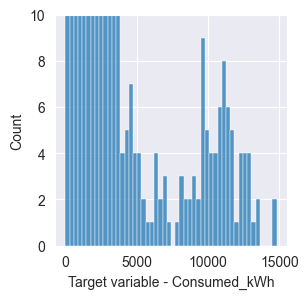

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

TARGET_COLUMN = column_lists["target_columns"][0]

# Plot the distribution of the target variable
plt.figure(figsize=(3, 3))
sns.histplot(data=df, x=TARGET_COLUMN, bins=50, kde=False)
plt.ylim(0,10)

# Add labels
plt.xlabel(f'Target variable - {TARGET_COLUMN}')
plt.ylabel('Count')

In [33]:
# filter df to only include rows where the target variable is greater than 3500
df_check = df[df[f"{TARGET_COLUMN}"] > 3500]
df_check

,PC6,Date,PC6_WeekIndex,Consumed_kWh,Blocked_kWh,MaxPower,number_of_chargers,WeekIndex,SinWeekOfYear,CosWeekOfYear,SinMonthOfYear,CosMonthOfYear,ChargeSocket_ID_count,ConnectionTimeHours,power,effective_charging_hrs,MaxOccupancy,SpareCap_Effective,SpareCap_Occup_kWh,SpareCap_Hrs,Effective%,Occupancy_kwh%,PC4,District,District-encoded_0,District-encoded_1,District-encoded_2,District-encoded_3,PC6-encoded_0,PC6-encoded_1,PC6-encoded_2,PC6-encoded_3,PC6-encoded_4,PC6-encoded_5,PC6-encoded_6,PC6-encoded_7,PC6-encoded_8,PC6-encoded_9,PC6-encoded_10,PC6-encoded_11,PC6-encoded_12,PC6-encoded_13,PC6-encoded_14,PC4-encoded_0,PC4-encoded_1,PC4-encoded_2,PC4-encoded_3,PC4-encoded_4,PC4-encoded_5,PC4-encoded_6,Engie,Ecotap,Pitpoint,WDS,Nuon,EvBox,Equans,Allego,Vattenfall,Total,FastChargerNumber,0-1,1-2,2-3,3-4,4-5,5-6,6-7,7-8,8-9,9-10,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-24,effective_charging_hrs0-1,effective_charging_hrs1-2,effective_charging_hrs2-3,effective_charging_hrs3-4,effective_charging_hrs4-5,effective_charging_hrs5-6,effective_charging_hrs6-7,effective_charging_hrs7-8,effective_charging_hrs8-9,effective_charging_hrs9-10,effective_charging_hrs10-11,effective_charging_hrs11-12,effective_charging_hrs12-13,effective_charging_hrs13-14,effective_charging_hrs14-15,effective_charging_hrs15-16,effective_charging_hrs16-17,effective_charging_hrs17-18,effective_charging_hrs18-19,effective_charging_hrs19-20,effective_charging_hrs20-21,effective_charging_hrs21-22,effective_charging_hrs22-23,effective_charging_hrs23-24,bus_count,metro_count,tram_count,parking_count,traffic_area,built_up_area,semi_built_up_area,recreational_area,agrarian_area,forest_nature_are,water_body_area,December 2022_EV,December 2022_hybrid,2022_0_to_10,2022_10_to_20,2022_20_to_30,2022_30_to_40,2022_40_to_50,2019.0_household,2019.0_income_1_to_40_percent,2019.0_income_41_to_80_percent,2019.0_income_81_to_100_percent,2019.0_income_average,2019.0_assets_1_to_40_percent,2019.0_assets_41_to_80_percent,2019.0_assets_81_to_100_percent,2019.0_assets_average,2019.0_Gemiddelde SES WOA totaalscore,Consumed_kWh_lag,Blocked_kWh_lag
RowIndex,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
39541,1012AB,2022-02-21,1012AB7,4055.47,2584.166667,0.121573,0.065217,0.107692,0.911492,0.784032,0.933013,0.750000,63.0,155.05,350.000000,243.328200,1512.0,21144.53,-2.906750e+04,1356.95,0.160931,2.153472,1012,Centrum,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.428571,0.000000,0.0,0.300000,0.022055,0.015300,0.009743,0.003905,0.000000,0.003841,0.001688,0.013348,0.030745,0.025520,0.017749,0.032366,0.031385,0.029446,0.048091,0.036040,0.050905,0.049482,0.041385,0.033365,0.040039,0.035657,0.034426,0.029119,0.016212,0.010796,0.009399,0.003962,0.000000,0.001762,0.001061,0.008097,0.021225,0.022656,0.011786,0.024031,0.026863,0.026119,0.039007,0.037722,0.048611,0.042831,0.034801,0.033005,0.037441,0.047039,0.047597,0.033343,0.5,1.0,0.5,0.0,0.151553,0.004200,0.000000,0.000000,0.0,0.0,0.005459,0.149805,0.239819,0.082353,0.090535,0.513158,0.400588,0.282517,0.445312,0.531003,0.671171,0.417722,0.653465,0.664910,0.431579,0.206030,0.447307,0.571885,0.273653,0.042809
39545,1012AB,2022-03-21,1012AB11,3876.35,2318.000000,0.121573,0.065217,0.169231,0.996354,0.560268,1.000000,0.500000,63.0,139.08,350.000000,232.581000,1512.0,21323.65,-2.347800e+04,1372.92,0.153823,1.931667,1012,Centrum,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.428571,0.000000,0.0,0.300000,0.044724,0.029256,0.014851,0.009027,0.005679,0.004028,0.002289,0.004759,0.023210,0.028804,0.030860,0.020309,0.036087,0.045480,0.050920,0.028396,0.050424,0.034955,0.035501,0.025175,0.019405,0.020871,0.027099,0.041529,0.028127,0.019482,0.01266

Text(0, 0.5, 'Count')

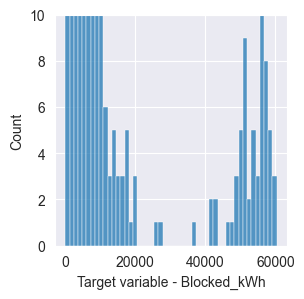

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

TARGET_COLUMN = column_lists["target_columns"][1]

# Plot the distribution of the target variable
plt.figure(figsize=(3, 3))
sns.histplot(data=df, x=TARGET_COLUMN, bins=50, kde=False)
plt.ylim(0, 10)

# Add labels
plt.xlabel(f'Target variable - {TARGET_COLUMN}')
plt.ylabel('Count')

In [35]:
# filter df to only include rows where the target variable is greater than 3500
df_check = df[df[f"{TARGET_COLUMN}"] > 20000]
df_check

,PC6,Date,PC6_WeekIndex,Consumed_kWh,Blocked_kWh,MaxPower,number_of_chargers,WeekIndex,SinWeekOfYear,CosWeekOfYear,SinMonthOfYear,CosMonthOfYear,ChargeSocket_ID_count,ConnectionTimeHours,power,effective_charging_hrs,MaxOccupancy,SpareCap_Effective,SpareCap_Occup_kWh,SpareCap_Hrs,Effective%,Occupancy_kwh%,PC4,District,District-encoded_0,District-encoded_1,District-encoded_2,District-encoded_3,PC6-encoded_0,PC6-encoded_1,PC6-encoded_2,PC6-encoded_3,PC6-encoded_4,PC6-encoded_5,PC6-encoded_6,PC6-encoded_7,PC6-encoded_8,PC6-encoded_9,PC6-encoded_10,PC6-encoded_11,PC6-encoded_12,PC6-encoded_13,PC6-encoded_14,PC4-encoded_0,PC4-encoded_1,PC4-encoded_2,PC4-encoded_3,PC4-encoded_4,PC4-encoded_5,PC4-encoded_6,Engie,Ecotap,Pitpoint,WDS,Nuon,EvBox,Equans,Allego,Vattenfall,Total,FastChargerNumber,0-1,1-2,2-3,3-4,4-5,5-6,6-7,7-8,8-9,9-10,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-24,effective_charging_hrs0-1,effective_charging_hrs1-2,effective_charging_hrs2-3,effective_charging_hrs3-4,effective_charging_hrs4-5,effective_charging_hrs5-6,effective_charging_hrs6-7,effective_charging_hrs7-8,effective_charging_hrs8-9,effective_charging_hrs9-10,effective_charging_hrs10-11,effective_charging_hrs11-12,effective_charging_hrs12-13,effective_charging_hrs13-14,effective_charging_hrs14-15,effective_charging_hrs15-16,effective_charging_hrs16-17,effective_charging_hrs17-18,effective_charging_hrs18-19,effective_charging_hrs19-20,effective_charging_hrs20-21,effective_charging_hrs21-22,effective_charging_hrs22-23,effective_charging_hrs23-24,bus_count,metro_count,tram_count,parking_count,traffic_area,built_up_area,semi_built_up_area,recreational_area,agrarian_area,forest_nature_are,water_body_area,December 2022_EV,December 2022_hybrid,2022_0_to_10,2022_10_to_20,2022_20_to_30,2022_30_to_40,2022_40_to_50,2019.0_household,2019.0_income_1_to_40_percent,2019.0_income_41_to_80_percent,2019.0_income_81_to_100_percent,2019.0_income_average,2019.0_assets_1_to_40_percent,2019.0_assets_41_to_80_percent,2019.0_assets_81_to_100_percent,2019.0_assets_average,2019.0_Gemiddelde SES WOA totaalscore,Consumed_kWh_lag,Blocked_kWh_lag
RowIndex,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
161173,1018VN,2022-01-10,1018VN1,8214.740,49323.1320,0.416712,0.968944,0.015385,0.619658,0.985471,0.750000,0.933013,572.0,8409.75,1799.520000,1440.760870,14976.0,78162.220,-1.504714e+07,6566.25,0.095103,175.203125,1018,Centrum,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.968944,0.0,0.0,0.783236,0.797500,0.800730,0.807015,0.815115,0.812232,0.811811,0.811816,0.811581,0.814909,0.787093,0.769970,0.771704,0.770888,0.793916,0.812475,0.803886,0.784243,0.790650,0.788979,0.779821,0.785558,0.799391,0.815063,0.784141,0.797500,0.805603,0.812465,0.818542,0.812832,0.815103,0.809223,0.819125,0.829245,0.814093,0.839317,0.848180,0.846708,0.877111,0.904049,0.912144,0.848145,0.841867,0.795168,0.781112,0.802465,0.796609,0.810943,0.0,0.0,0.0,0.0,0.013101,0.042373,0.000000,0.000000,0.0,0.0,0.005455,0.334630,0.60181,0.380882,0.399177,0.707237,0.729677,0.683916,0.929688,0.507328,0.639640,0.481013,0.694484,0.543730,0.505263,0.306533,0.544496,0.573482,0.554311,0.817084
161174,1018VN,2022-01-17,1018VN2,9686.790,55606.7688,0.420547,0.978261,0.030769,0.677302,0.967508,0.750000,0.933013,584.0,9669.93,1816.080000,1719.037138,15120.0,77485.050,-1.747419e+07,5450.07,0.111123,201.456875,1018,Centrum,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.978261,0.0,0.0,0.898675,0.902747,0.906951,0.917397,0.924242,0.925340,0.935394,0.952683,0.983801,0.969573,0.958650,0.955840,0.947704,0.931646,0.918272,0.927802,0.903449,0.872312,0.861732,0.877411,0.870090,0.872982,0.886998,0.897381,0.899713,0.903404,0.913878,0.927413,0.931600,0.92